# Video Game Analysis
**Author:** Rob Kelley   
**Date:** 2/14/22  
**Version:** 1.0  

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Basic Data Cleanup

In [65]:
df = pd.read_csv('vgsales.csv')

In [66]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [67]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [68]:
df.Year = list(map(lambda x: str(x)[0:4], df.Year))

In [69]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [70]:
df.rename(columns={'NA_Sales':'NA_Sales_M',
                   'EU_Sales':'EU_Sales_M',
                   'JP_Sales':'JP_Sales_M',
                   'Global_Sales':'Global_Sales_M',
                   'Other_Sales':'Other_Sales_M'},inplace=True) 

In [71]:
df.dtypes

Rank                int64
Name               object
Platform           object
Year               object
Genre              object
Publisher          object
NA_Sales_M        float64
EU_Sales_M        float64
JP_Sales_M        float64
Other_Sales_M     float64
Global_Sales_M    float64
dtype: object

In [72]:
#df.drop('Rank', inplace=True, axis=1)

In [73]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M
5316,5318,WWE All Stars,X360,2011,Fighting,THQ,0.18,0.14,0.0,0.03,0.35
7616,7618,Roadsters 99,N64,1999,Racing,Titus,0.06,0.13,0.0,0.01,0.20
1933,1935,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.0,0.10,1.07
381,382,Assassin's Creed: Unity,XOne,2014,Action,Ubisoft,2.26,0.89,0.0,0.30,3.46
13048,13050,Disney's Party,GC,2002,Misc,Electronic Arts,0.04,0.01,0.0,0.00,0.05


In [74]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_M',
       'EU_Sales_M', 'JP_Sales_M', 'Other_Sales_M', 'Global_Sales_M'],
      dtype='object')

In [75]:
df= df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_M',
       'EU_Sales_M', 'JP_Sales_M', 'Other_Sales_M', 'Global_Sales_M','Rank']]

In [76]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5


Get a subset of the data so we can transpose and plot.

In [81]:
wii = df.query('Platform=="Wii" and Year=="2006"')

In [90]:
wii.iloc[0:3,5:-1]

,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M
0,41.49,29.02,3.77,8.46,82.74
7,14.03,9.20,2.93,2.85,29.02
100,3.83,2.19,0.60,0.70,7.31


In [91]:
wii.iloc[:,5:6]

,NA_Sales_M
0,41.49
7,14.03
100,3.83
490,0.87
707,1.07
1139,0.80
1340,1.23
1525,0.46
2201,0.83
2346,0.81


In [92]:
wii.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,8
100,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,101
490,WarioWare: Smooth Moves,Wii,2006,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92,491
707,Super Monkey Ball: Banana Blitz,Wii,2006,Misc,Sega,1.07,0.92,0.04,0.24,2.27,709


In [98]:
wii2006 = wii.iloc[0:2,5:9]

<AxesSubplot:>

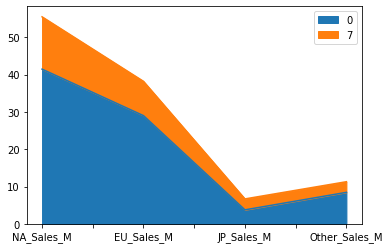

In [101]:
df.query('Platform=="Wii" and Year=="2006"').iloc[0:2,5:9].T.plot(kind='area')

In [104]:
df.describe()

,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441,8300.605254
std,0.816683,0.505351,0.309291,0.188588,1.555028,4791.853933
min,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,4151.250000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,8300.500000
75%,0.240000,0.110000,0.040000,0.040000,0.470000,12449.750000
max,41.490000,29.020000,10.220000,10.570000,82.740000,16600.000000


In [105]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5


In [107]:
df['Global_Sales']=df['Global_Sales_M']*1000000

In [109]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_M',
       'EU_Sales_M', 'JP_Sales_M', 'Other_Sales_M', 'Global_Sales_M', 'Rank',
       'Global_Sales'],
      dtype='object')

In [110]:
df.describe()

,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,1.659800e+04
mean,0.264667,0.146652,0.077782,0.048063,0.537441,8300.605254,5.374407e+05
std,0.816683,0.505351,0.309291,0.188588,1.555028,4791.853933,1.555028e+06
min,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.060000,4151.250000,6.000000e+04
50%,0.080000,0.020000,0.000000,0.010000,0.170000,8300.500000,1.700000e+05
75%,0.240000,0.110000,0.040000,0.040000,0.470000,12449.750000,4.700000e+05
max,41.490000,29.020000,10.220000,10.570000,82.740000,16600.000000,8.274000e+07


In [111]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,82740000.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,40240000.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3,35820000.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5,31370000.0


<AxesSubplot:ylabel='Platform'>

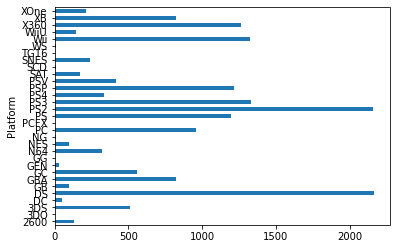

In [114]:
df.Platform.groupby(df.Platform).count().plot(kind="barh")

In [115]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,82740000.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,40240000.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3,35820000.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5,31370000.0


In [124]:
wii = df.query('Platform=="Wii" and Name!="Wii Sports"')

In [125]:
wii

,Name,Platform,Year,Genre,Publisher,NA_Sales_M,EU_Sales_M,JP_Sales_M,Other_Sales_M,Global_Sales_M,Rank,Global_Sales
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3,35820000.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4,33000000.0
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,8,29020000.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,9,28620000.0
13,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,14,22720000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16517,Teenage Mutant Ninja Turtles,Wii,2007,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,16520,10000.0
16552,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01,16555,10000.0
16573,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01,16576,10000.0
16574,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01,16577,10000.0


<AxesSubplot:>

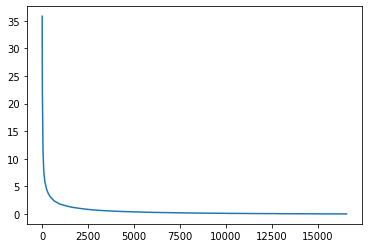

In [126]:
wii['Global_Sales_M'].plot()

In [ ]:
........................................................................................................................








